In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('20200905_HINDUSTAN UNILEVER LTD_1day.csv',index_col="DisplayDate",parse_dates=True)


In [3]:
dataset.head()


,Open,High,Low,Close,Volume,OI
DisplayDate,,,,,,
2020-09-04,2115.00,2139.05,2115.00,2131.00,1619906,0
2020-09-03,2153.00,2154.45,2128.05,2139.15,1590711,0
2020-09-02,2171.00,2185.00,2136.55,2141.65,1667810,0
2020-09-01,2149.95,2174.90,2111.75,2161.65,1738013,0
2020-08-31,2152.00,2167.50,2100.65,2117.35,3534525,0


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
OI        False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2649 entries, 2020-09-04 to 2010-01-04
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2649 non-null   float64
 1   High    2649 non-null   float64
 2   Low     2649 non-null   float64
 3   Close   2649 non-null   float64
 4   Volume  2649 non-null   int64  
 5   OI      2649 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 144.9 KB


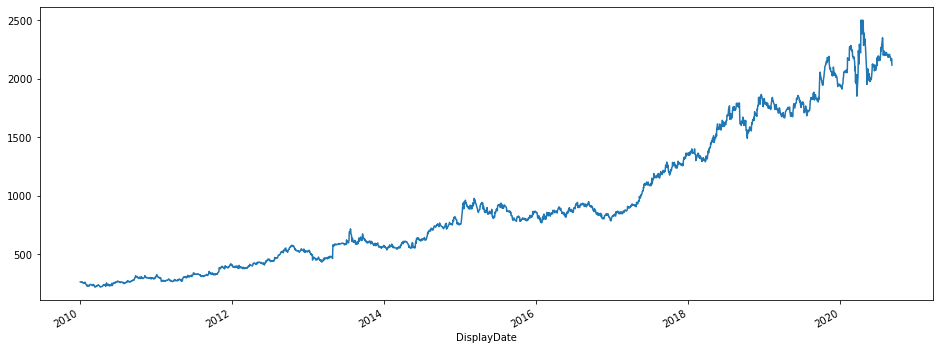

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,OI
DisplayDate,,,,,,
2020-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-28,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-27,2157.435714,2170.185714,2128.857143,2144.857143,2.037584e+06,0.0
2020-08-26,2167.021429,2176.892857,2135.285714,2152.257143,2.113062e+06,0.0
2020-08-25,2172.935714,2183.100000,2141.992857,2157.964286,2.139372e+06,0.0


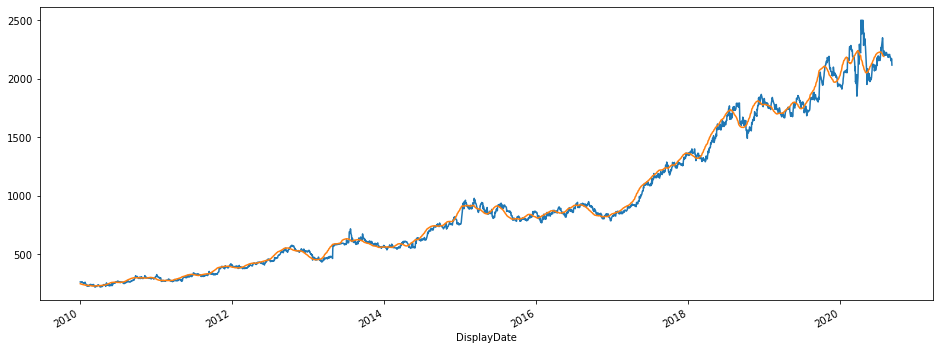

In [8]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

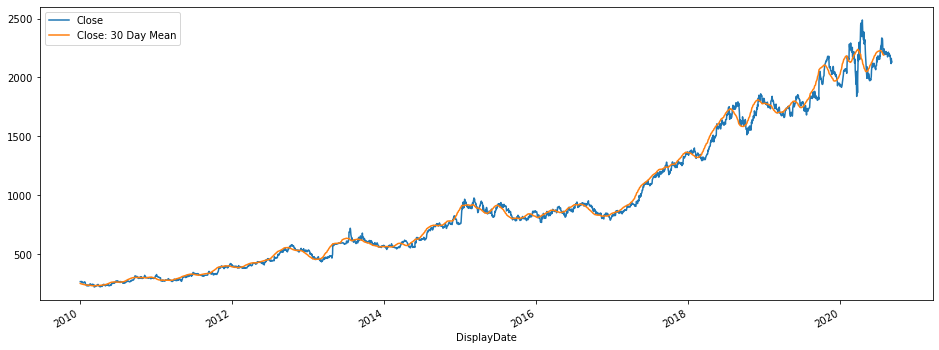

In [9]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

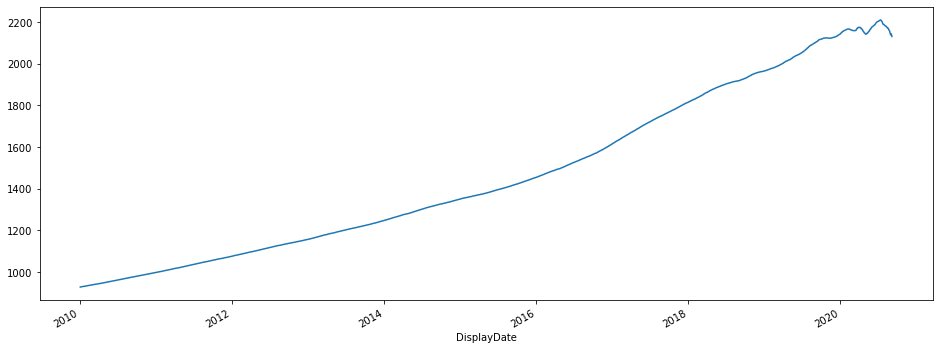

In [10]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [11]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [15]:
# Initialising the RNN
regressor = Sequential()



In [16]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [17]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0336
Epoch 2/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0042
Epoch 3/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0043
Epoch 4/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0036
Epoch 5/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0040
Epoch 6/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0034
Epoch 7/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0037
Epoch 8/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0035
Epoch 9/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0032
Epoch 10/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0031
Epoch 13/100
38/38 [=

38/38 [==============================] - 4s 101ms/step - loss: 7.7836e-04
Epoch 100/100
38/38 [==============================] - 4s 93ms/step - loss: 7.7537e-04


In [18]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('20200905_HINDUSTAN UNILEVER LTD_1day.csv',index_col="DisplayDate",parse_dates=True)



In [19]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [20]:
dataset_test.head()

,Open,High,Low,Close,Volume,OI
DisplayDate,,,,,,
2020-09-04,2115.00,2139.05,2115.00,2131.00,1619906,0
2020-09-03,2153.00,2154.45,2128.05,2139.15,1590711,0
2020-09-02,2171.00,2185.00,2136.55,2141.65,1667810,0
2020-09-01,2149.95,2174.90,2111.75,2161.65,1738013,0
2020-08-31,2152.00,2167.50,2100.65,2117.35,3534525,0


In [21]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2649 entries, 2020-09-04 to 2010-01-04
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2649 non-null   float64
 1   High    2649 non-null   float64
 2   Low     2649 non-null   float64
 3   Close   2649 non-null   float64
 4   Volume  2649 non-null   int64  
 5   OI      2649 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 144.9 KB


In [32]:
dataset_test["Volume"] = dataset_test["Volume"].astype(float)

In [33]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [34]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2649 entries, 2020-09-04 to 2010-01-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2649 non-null   float64
dtypes: float64(1)
memory usage: 41.4 KB


In [35]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [36]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


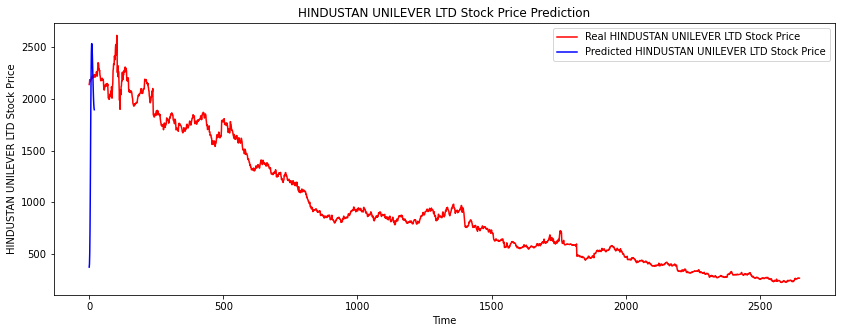

In [37]:

# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(real_stock_price, color = 'red', label = 'Real HINDUSTAN UNILEVER LTD Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted HINDUSTAN UNILEVER LTD Stock Price')
plt.title('HINDUSTAN UNILEVER LTD Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HINDUSTAN UNILEVER LTD Stock Price')
plt.legend()
plt.show()
